In [15]:
import numpy as np
import pandas as pd 
from matplotlib.figure import Figure
from matplotlib.axes import Axes
import matplotlib.pyplot as plt


plt.style.use("bmh")
plt.rcParams.update(
    {
        "font.size": 7,
        "figure.dpi": 200
    }
)


In [4]:
import pathlib
def load_data(data_path: pathlib.Path) -> pd.DataFrame:
    return pd.read_csv(data_path)

et_hourly = load_data(pathlib.Path("../data/ETTh1.csv"))
et_hourly.head(10)


,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
5,2016-07-01 05:00:00,5.626,2.143,1.528,0.533,4.051,1.371,21.174000
6,2016-07-01 06:00:00,7.167,2.947,2.132,0.782,5.026,1.858,22.792000
7,2016-07-01 07:00:00,7.435,3.282,2.310,1.031,5.087,2.224,23.143999
8,2016-07-01 08:00:00,5.559,3.014,2.452,1.173,2.955,1.432,21.667000
9,2016-07-01 09:00:00,4.555,2.545,1.919,0.817,2.680,1.371,17.445999


In [5]:
et_hourly.describe().T

,count,mean,std,min,25%,50%,75%,max
HUFL,17420.0,7.375141,7.067744,-22.705999,5.827,8.774,11.788,23.643999
HULL,17420.0,2.242242,2.042342,-4.756000,0.737,2.210,3.684,10.114000
MUFL,17420.0,4.300239,6.826978,-25.087999,3.296,5.970,8.635,17.341000
MULL,17420.0,0.881568,1.809293,-5.934000,-0.284,0.959,2.203,7.747000
LUFL,17420.0,3.066062,1.164506,-1.188000,2.315,2.833,3.625,8.498000
LULL,17420.0,0.856932,0.599552,-1.371000,0.670,0.975,1.218,3.046000
OT,17420.0,13.324672,8.566946,-4.080000,6.964,11.396,18.079,46.007000


In [6]:
et_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17420 entries, 0 to 17419
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    17420 non-null  object 
 1   HUFL    17420 non-null  float64
 2   HULL    17420 non-null  float64
 3   MUFL    17420 non-null  float64
 4   MULL    17420 non-null  float64
 5   LUFL    17420 non-null  float64
 6   LULL    17420 non-null  float64
 7   OT      17420 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


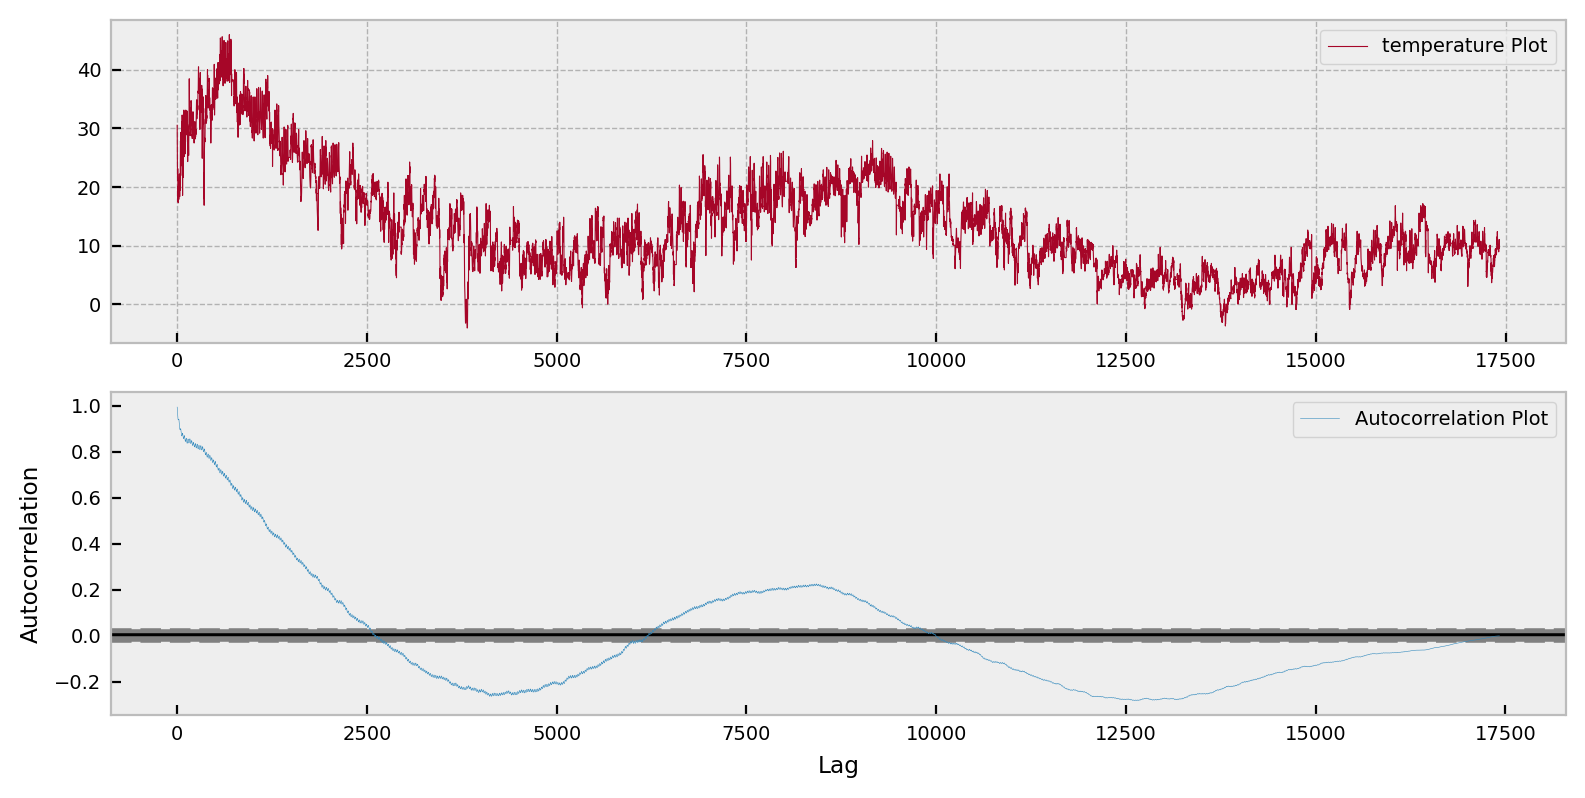

In [18]:
def temperature_plot(df: pd.DataFrame) -> None:
    fig: Figure = plt.figure(figsize=(16//2, 9//2))
    ax: Axes = fig.add_subplot(211)
    ax_2: Axes = fig.add_subplot(212)
    ax.plot(df["OT"], color="C1", label="temperature Plot", linewidth=0.4)
    ax.legend()
    
    pd.plotting.autocorrelation_plot(df["OT"], ax=ax_2, label="Autocorrelation Plot", linewidth=0.2)
    ax_2.legend()
    plt.tight_layout()
    plt.show()
    
temperature_plot(
    df=et_hourly
)

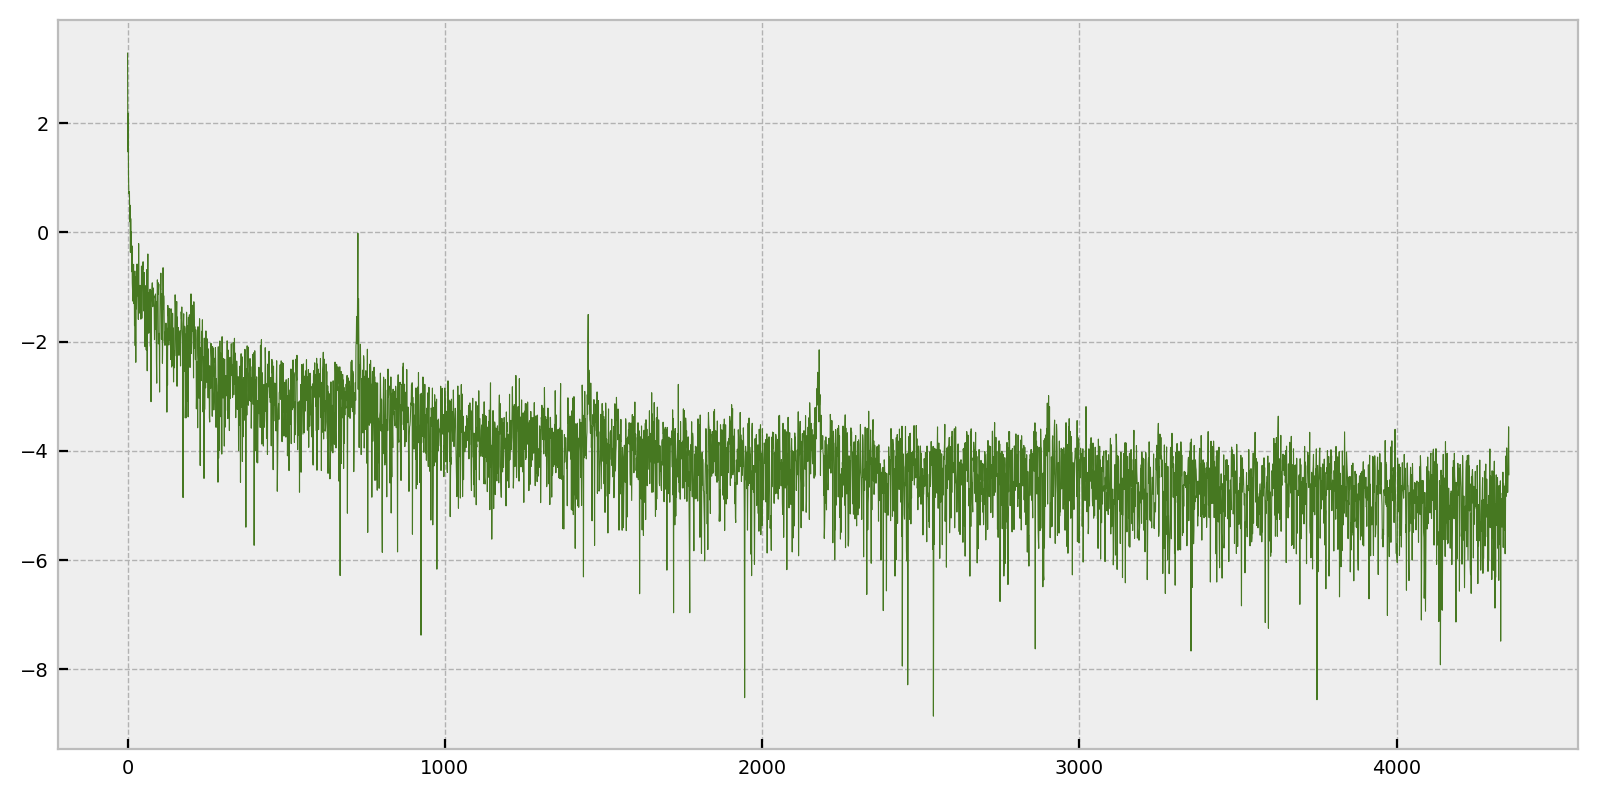

In [30]:
def perform_fft_on_series_data(series_data: pd.Series):
    fft = np.fft.fft(series_data)
    amplitudes = np.abs(fft/(len(fft)/2))
    fig: Figure = plt.figure(figsize=(16//2, 9//2))
    ax: Axes = fig.add_subplot()
    ax.plot(np.log(amplitudes[:int(len(series_data)/4)]), color="C3", linewidth=0.4, label="Static Spectogram of Time series data")
    plt.tight_layout()
    plt.show()
    
perform_fft_on_series_data(
    series_data=et_hourly["OT"]
)

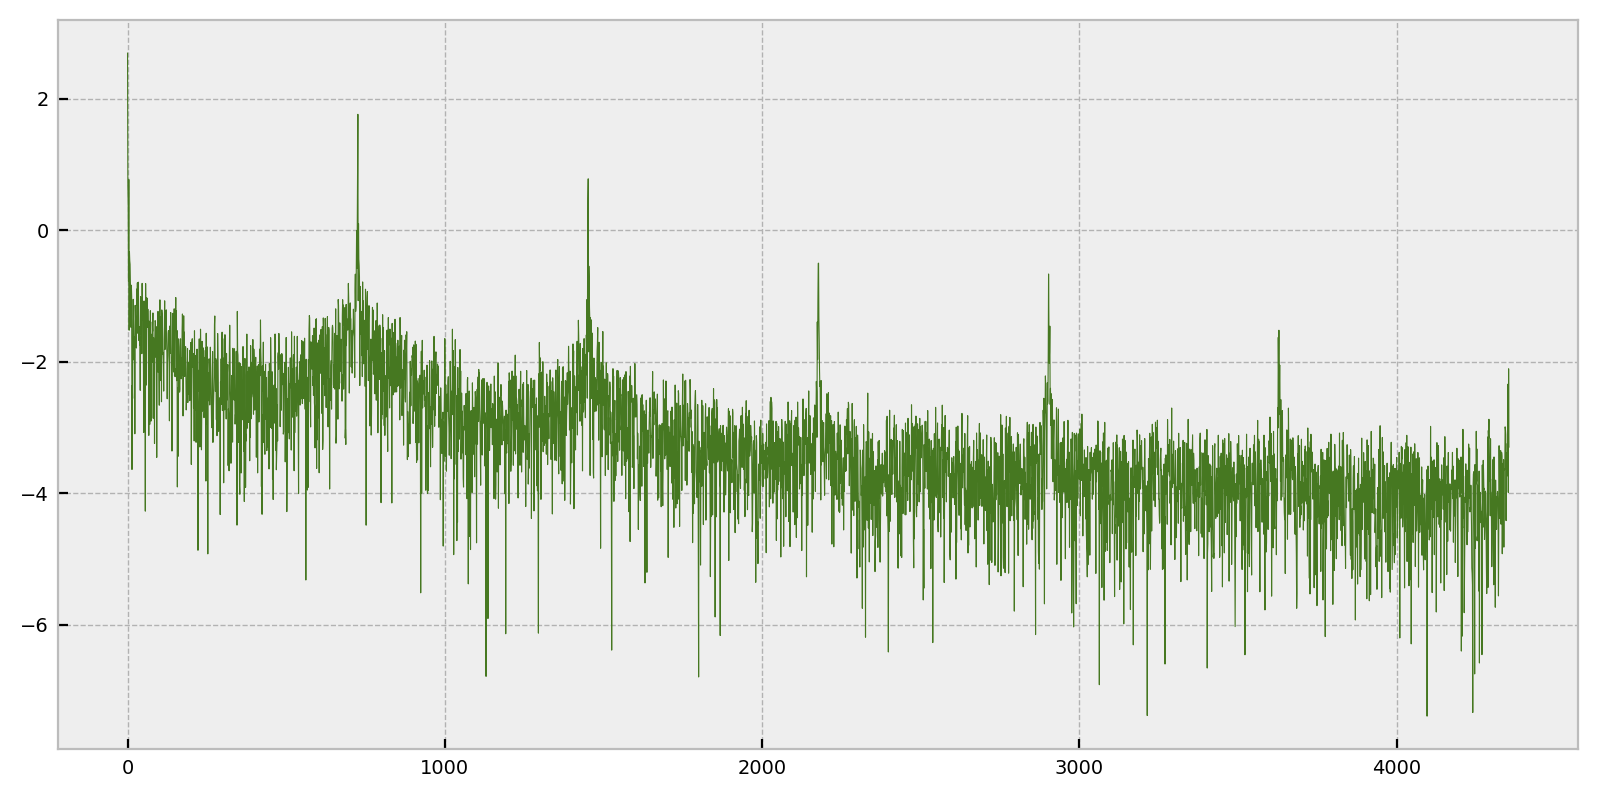

In [31]:
perform_fft_on_series_data(
    series_data=et_hourly["HUFL"]
)

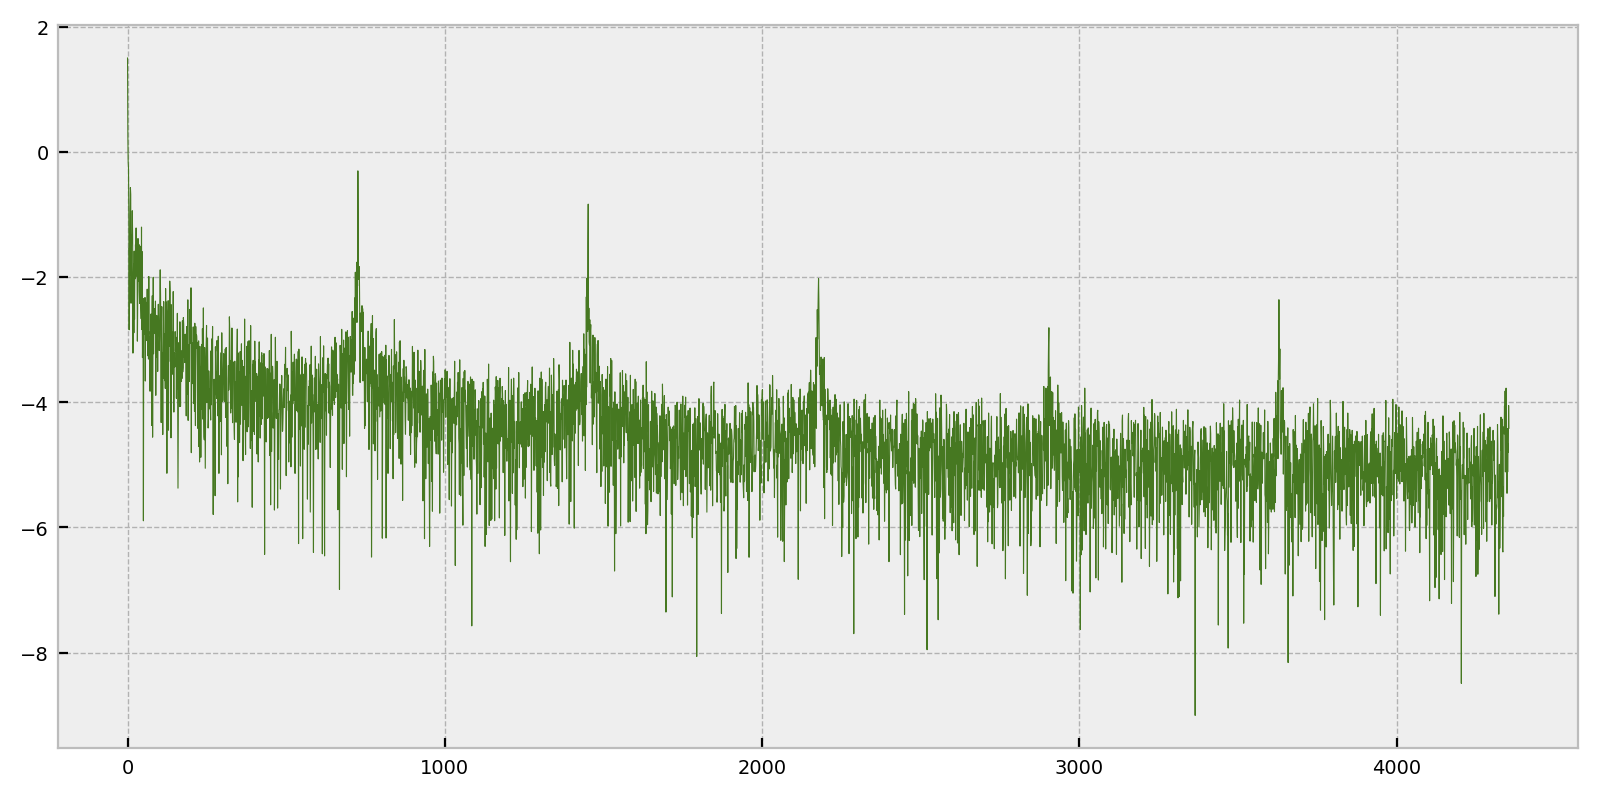

In [32]:
perform_fft_on_series_data(
    series_data=et_hourly["HULL"]
)

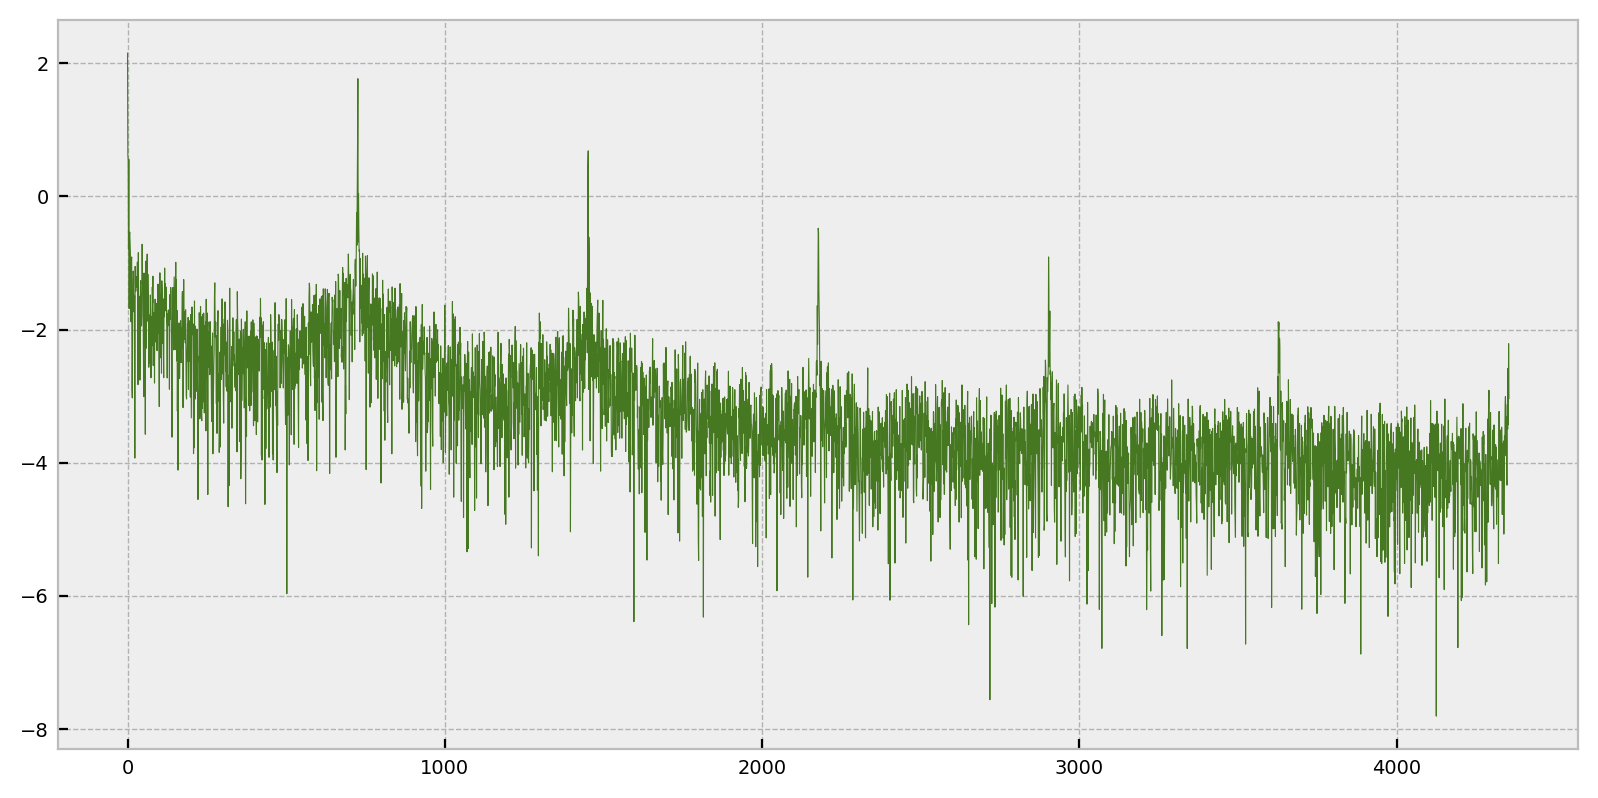

In [33]:
perform_fft_on_series_data(
    series_data=et_hourly["MUFL"]
)

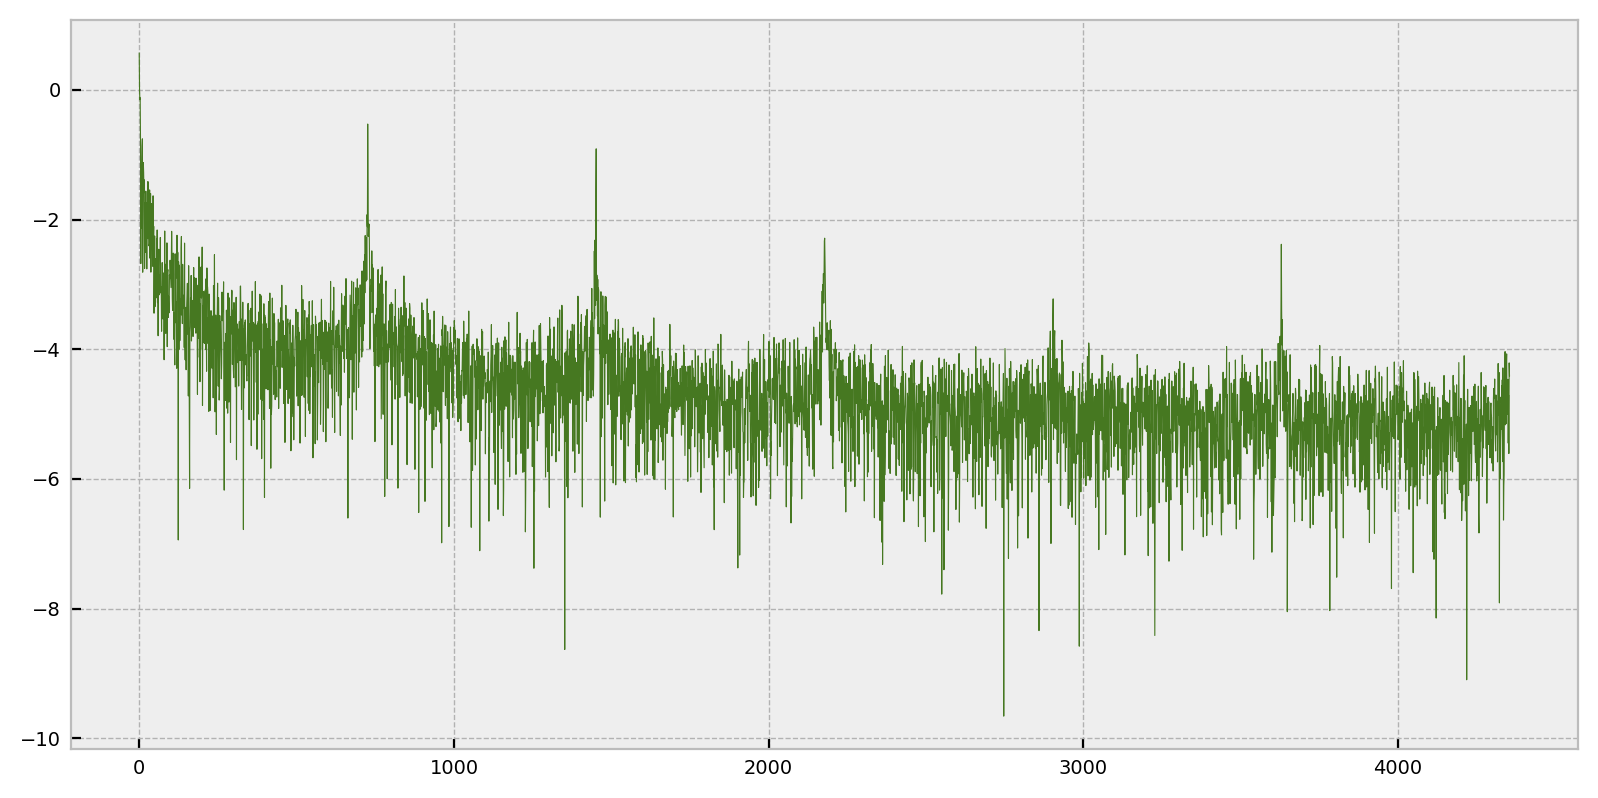

In [34]:
perform_fft_on_series_data(
    series_data=et_hourly["MULL"]
)